# Trích xuất đặc trưng dựa trên phương pháp TF-IDF 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Tải dữ liệu đã tiền xử lý

In [2]:
#loading the phishing URLs data to dataframe
data0 = pd.read_csv('/Users/HP/projectML/email_pre_processed.csv')
data0.head()


,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


## 2. Chia dataset thành tập train và tập test 

In [3]:
from sklearn.model_selection import train_test_split
X_train_email, X_test_email, y_train, y_test = train_test_split(data0['text'], 
                                                    data0['spam'], 
                                                    random_state=42)
# the split ratio is 25% by default
# Here df['sms_message'] is X and df['label'] is y for both test and training data
print('Number of rows in the total set: {}'.format(data0.shape[0]))
print('Number of rows in the training set: {}'.format(X_train_email.shape[0]))
print('Number of rows in the test set: {}'.format(X_test_email.shape[0]))


Number of rows in the total set: 5728
Number of rows in the training set: 4296
Number of rows in the test set: 1432


In [4]:
#count_vector = CountVectorizer(ngram_range=(1, 1), stop_words =  'english')

#Fit the training data and then return the matrix
#X_train = count_vector.fit_transform(X_train_email) 
# to get the the list of feature words that are lowercase with no puttutaion or stop words
#Since you fit transform X data training
# they convert data to integer data

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
#X_test = count_vector.transform(X_test_email)
#Since you transform X data testing
# they convert data to integer data

## 3. Sử dụng TF-IDF 

Quy trình có sự tương tự như BOW

- Khởi tạo từ điển từ ngữ trong tập huấn luyện.
- Tính toán các giá trị TF và IDF. Biểu diễn các email trong tập huấn luyện thành dạng các vector, mỗi chiều tương ứng với giá trị TF-IDF của từ trong từ điển đối với email.

Công cụ sử dụng: TfidfVectorizer()

- Thực tế TfidfVectorizer() là sự kết hợp của CountVectorizer() và Tfidftransformer()
- Sử dụng Tfidftransformer() để tính giá trị IDF

In [5]:
#tf idf
tf_idf = TfidfVectorizer(ngram_range=(1, 1), lowercase = True , stop_words =  'english')
#applying tf idf to training data
X_train_email_tf = tf_idf.fit_transform(X_train_email)
#applying tf idf to training data
#X_train_email_tf = tf_idf.transform(X_train_email)

print("n_samples: %d, n_features: %d" % X_train_email_tf.shape)

n_samples: 4296, n_features: 26736


In [6]:
#transforming test data into tf-idf matrix
X_test_email_tf = tf_idf.transform(X_test_email)
print("n_samples: %d, n_features: %d" % X_test_email_tf.shape)

n_samples: 1432, n_features: 26736


In [7]:
print(tf_idf.idf_) 

[6.10757585 7.57391291 8.6725252  ... 8.6725252  8.2670601  7.97937802]


In [8]:
X_train_feature_list = tf_idf.get_feature_names_out()
X_train_feature_list 

array(['aa', 'aaa', 'aadedeji', ..., 'zzn', 'zzncacst', 'zzzz'],
      dtype=object)

In [9]:
doc_array =  X_train_email_tf.toarray()
doc_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
frequency_matrix_X_train = pd.DataFrame((doc_array),columns = X_train_feature_list)
frequency_matrix_X_train

,aa,aaa,aadedeji,aagrawal,aal,aaldous,aall,aanalysis,aaron,aawesome,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Huấn luyện mô hình

Nhóm sử dụng 4 mô hình gồm Gaussian Naive Bayes, SVM, KNN và RandomForest.

### 4.1 Gaussian Naive Bayes 

In [11]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_email_tf.toarray(), y_train)

GaussianNB()

In [12]:
predictions = naive_bayes.predict(X_test_email_tf.toarray())
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.9476256983240223
Precision score:  0.8373983739837398
Recall score:  0.9537037037037037
F1 score:  0.8917748917748918


### 5.2 SVM

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [14]:
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
# param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear']}


# gs_svm = GridSearchCV(SVC(),param_grid_SVM,cv=4) 
# gs_svm.fit(X_train_email_tf, y_train)

In [15]:
# gs_svm.best_score_

In [16]:
# gs_svm.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học 

In [17]:
#Create a svm Classifier
clf = svm.SVC(C=1, gamma=1,kernel='linear') 

#Train the model using the training sets
clf.fit(X_train_email_tf, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test_email_tf)

In [18]:
print('Accuracy score: ', format(accuracy_score(y_pred_svm, y_test)))
print('Precision score: ', format(precision_score(y_test ,y_pred_svm)))
print('Recall score: ', format(recall_score(y_test ,y_pred_svm)))
print('F1 score: ', format(f1_score(y_test ,y_pred_svm)))

Accuracy score:  0.9909217877094972
Precision score:  0.9944444444444445
Recall score:  0.9701897018970189
F1 score:  0.9821673525377229


### 5.3 KNN 

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [23]:
 from sklearn.neighbors import KNeighborsClassifier
# param_grid = {'n_neighbors': list(range(1,9)),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'] }
# gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=3)
# gs_knn.fit(X_train_email_tf, y_train)

In [24]:
# gs_knn.best_score_

In [25]:
# gs_knn.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [26]:
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'distance',metric = 'minkowski')

knn.fit(X_train_email_tf, y_train) 
y_pred_knn = knn.predict(X_test_email_tf)

In [27]:
print('Accuracy score: ', format(accuracy_score(y_pred_knn, y_test))) 
print('Precision score: ', format(precision_score(y_pred_knn,y_test)))
print('Recall score: ', format(recall_score(y_pred_knn,y_test)))
print('F1 score: ', format(f1_score(y_pred_knn,y_test)))

Accuracy score:  0.973463687150838
Precision score:  0.9105691056910569
Recall score:  0.9853372434017595
F1 score:  0.9464788732394366


### 5.4 Randomforest

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [28]:
from sklearn.ensemble import RandomForestClassifier
# param_grid_RF = {'n_estimators': [25, 50, 100, 150],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9],}
# gs_rf = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=5)
# gs_rf.fit(X_train_email_tf, y_train)

In [29]:
# gs_rf.best_score_

In [30]:
# gs_rf.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [31]:
rf = RandomForestClassifier(n_estimators=150,max_depth=9,max_features= None,max_leaf_nodes=9,n_jobs=-1)
rf_model = rf.fit(X_train_email_tf, y_train)
y_pred_rf=rf_model.predict(X_test_email_tf)

In [32]:
print('Accuracy score: ', format(accuracy_score(y_pred_rf,y_test)))  
print('Precision score: ', format(precision_score(y_pred_rf,y_test)))
print('Recall score: ', format(recall_score(y_pred_rf,y_test)))
print('F1 score: ', format(f1_score(y_pred_rf,y_test)))

Accuracy score:  0.9266759776536313
Precision score:  0.9376693766937669
Recall score:  0.8084112149532711
F1 score:  0.8682559598494354


In [34]:
import matplotlib.pyplot as plt
x_labels = ["SVM", "Naive Bayes", "k-NN", "Random Forest"]
accuracy_scores = [accuracy_score(y_test, y_pred_svm), accuracy_score(predictions,y_test), accuracy_score(y_pred_knn,y_test), accuracy_score(y_pred_rf,y_test)]
precision_scores = [precision_score(y_pred_svm,y_test), precision_score(predictions,y_test), precision_score(y_pred_knn,y_test), precision_score(y_pred_rf,y_test)]
recall_scores = [recall_score(y_pred_svm,y_test), recall_score(predictions,y_test), recall_score(y_pred_knn,y_test), recall_score(y_pred_rf,y_test)]
f1_scores = [f1_score(y_pred_svm,y_test), f1_score(predictions,y_test), f1_score(y_pred_knn,y_test), f1_score(y_pred_rf,y_test)]

(0.0, 1.0)

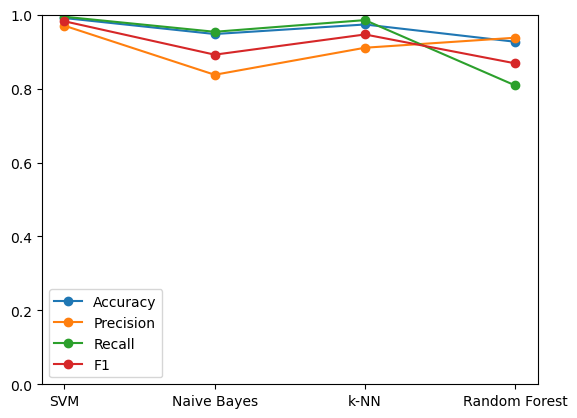

In [35]:
plt.plot(x_labels, accuracy_scores, marker = 'o')
plt.plot(x_labels, precision_scores, marker = 'o')
plt.plot(x_labels, recall_scores, marker = 'o')
plt.plot(x_labels, f1_scores, marker = 'o')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
plt.ylim([0,1])